In [1]:
import tabula as t
import pandas as pd 

In [2]:
pdf_path = 'C:/Users/zeus/Desktop/Table Extraction/Office2.pdf'

# Use read_pdf to extract tables
tables = t.read_pdf(pdf_path, pages=[1, 2])

# Use convert_into to save tables to a CSV file
t.convert_into(pdf_path, 'C:/Users/zeus/Desktop/Table Extraction/Office.csv', output_format='csv', pages=[1, 2])

# Print a message after the conversion
print("Conversion to CSV completed successfully.")

#reading the csv file.
csv_path = 'C:/Users/zeus/Desktop/Table Extraction/Office.csv'
df = pd.read_csv(csv_path)

#remove the extra name row that got added from page 2.
df = df[df['Name'] != 'Name']

# drop the index column 
df = df.reset_index(drop= True)

#create a csv file which will be the updated one.
df.to_csv('C:/Users/zeus/Desktop/Table Extraction/Updated_Office.csv', index = False)


Error importing jpype dependencies. Fallback to subprocess.
No module named 'jpype'


Conversion to CSV completed successfully.


In [3]:
# now this file has an addtion column generated while extracting out the data from the pdf file.
df.head(10)

,Name,Gender,Start date,Age,Designation,Office Location,Unnamed: 6,Salary
0,Airi Satou,Female,28-11-2008,33,Accountant,Tokyo,$,"1,62,700"
1,Ashton Cox,Male,12-01-2009,66,Junior Technical Author,San Francisco,$,"8 6,000"
2,Brenden Wagner,Male,07-06-2011,28,Software Engineer,San Francisco,$,"2,06,850"
3,Bruno Nash,Male,03-05-2011,38,Software Engineer,London,$,"1,63,500"
4,Cara Stevens,Female,06-12-2011,46,Sales Assistant,New York,$,"1,45,600"
5,Charde Marshall,Female,16-10-2008,36,Regional Director,San Francisco,$,"4,70,600"
6,Dai Rios,Male,26-09-2012,35,Personnel Lead,Edinburgh,$,"2,17,500"
7,Doris Wilder,Female,20-09-2010,23,Sales Assistant,Sydney,$,"8 5,600"
8,Fiona Green,Female,11-03-2010,48,Chief Operating Officer (COO),San Francisco,$,"8,50,000"
9,Gavin Cortez,Male,26-10-2008,22,Team Leader,San Francisco,$,"2,35,500"


In [4]:
df.drop('Unnamed: 6', axis = 1, inplace = True)
# so we have successfully dropped the column which is showing abnormality.

In [5]:
df.head(10)
#removed the anomality column

,Name,Gender,Start date,Age,Designation,Office Location,Salary
0,Airi Satou,Female,28-11-2008,33,Accountant,Tokyo,"1,62,700"
1,Ashton Cox,Male,12-01-2009,66,Junior Technical Author,San Francisco,"8 6,000"
2,Brenden Wagner,Male,07-06-2011,28,Software Engineer,San Francisco,"2,06,850"
3,Bruno Nash,Male,03-05-2011,38,Software Engineer,London,"1,63,500"
4,Cara Stevens,Female,06-12-2011,46,Sales Assistant,New York,"1,45,600"
5,Charde Marshall,Female,16-10-2008,36,Regional Director,San Francisco,"4,70,600"
6,Dai Rios,Male,26-09-2012,35,Personnel Lead,Edinburgh,"2,17,500"
7,Doris Wilder,Female,20-09-2010,23,Sales Assistant,Sydney,"8 5,600"
8,Fiona Green,Female,11-03-2010,48,Chief Operating Officer (COO),San Francisco,"8,50,000"
9,Gavin Cortez,Male,26-10-2008,22,Team Leader,San Francisco,"2,35,500"


In [6]:
df.info()
#no nulls or error columns is there. So the data wrangling is done. Now it is time to focus on calculations part.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Name             100 non-null    object
 1   Gender           100 non-null    object
 2   Start date       100 non-null    object
 3   Age              100 non-null    int64 
 4   Designation      100 non-null    object
 5   Office Location  100 non-null    object
 6   Salary           100 non-null    object
dtypes: int64(1), object(6)
memory usage: 5.6+ KB


In [7]:
df.iloc[8]
# here is the one of the element from the dataframe.

Name                                 Fiona Green
Gender                                    Female
Start date                            11-03-2010
Age                                           48
Designation        Chief Operating Officer (COO)
Office Location                    San Francisco
Salary                                  8,50,000
Name: 8, dtype: object

In [8]:
df.dtypes
# here the data type are little messy so there is a need to assign a perfect name to each element 
# so that calculation don't show error while computation.

Name               object
Gender             object
Start date         object
Age                 int64
Designation        object
Office Location    object
Salary             object
dtype: object

In [9]:
df['Salary'] = df['Salary'].replace('[/ ,]','', regex = True).astype(float)
# in salary column we have seen some spacings and commas which is not acceptable for the calculation point of view,
# Hence Removed


In [10]:
df['Start date'] = pd.to_datetime(df['Start date'], format='%d-%m-%Y')
# df['Start date'] = df['Start date'].replace('/00:00:00', '')

In [11]:
convert_dict = {'Name' : str,
                'Designation': str,
                'Office Location': str,
                'Age': int,
                'Salary' : int,
                'Gender' : str

                }
df = df.astype(convert_dict)
df.dtypes

Name                       object
Gender                     object
Start date         datetime64[ns]
Age                         int32
Designation                object
Office Location            object
Salary                      int32
dtype: object

In [12]:

df[['Name', 'Start date', 'Age','Designation','Office Location', 'Salary', 'Gender']]


,Name,Start date,Age,Designation,Office Location,Salary,Gender
0,Airi Satou,2008-11-28,33,Accountant,Tokyo,162700,Female
1,Ashton Cox,2009-01-12,66,Junior Technical Author,San Francisco,86000,Male
2,Brenden Wagner,2011-06-07,28,Software Engineer,San Francisco,206850,Male
3,Bruno Nash,2011-05-03,38,Software Engineer,London,163500,Male
4,Cara Stevens,2011-12-06,46,Sales Assistant,New York,145600,Female
...,...,...,...,...,...,...,...
95,Noah Simmons,2010-06-25,44,Systems Administrator,Edinburgh,103500,Male
96,Sophia Harrison,2013-09-14,26,UX/UI Designer,San Francisco,115000,Female
97,Owen Dean,2011-12-20,42,HR Manager,New York,155000,Male
98,Zoe Bennett,2012-05-03,31,Senior Sales Executive,London,168500,Female


In [13]:
df['Email'] = df['Name'].str.lower().str.replace(' ', '') + '@gmail.com'
# an addition of new column 'Email' using the name column and '@gmail.com' string.

In [14]:
df.head(12)

,Name,Gender,Start date,Age,Designation,Office Location,Salary,Email
0,Airi Satou,Female,2008-11-28,33,Accountant,Tokyo,162700,airisatou@gmail.com
1,Ashton Cox,Male,2009-01-12,66,Junior Technical Author,San Francisco,86000,ashtoncox@gmail.com
2,Brenden Wagner,Male,2011-06-07,28,Software Engineer,San Francisco,206850,brendenwagner@gmail.com
3,Bruno Nash,Male,2011-05-03,38,Software Engineer,London,163500,brunonash@gmail.com
4,Cara Stevens,Female,2011-12-06,46,Sales Assistant,New York,145600,carastevens@gmail.com
5,Charde Marshall,Female,2008-10-16,36,Regional Director,San Francisco,470600,chardemarshall@gmail.com
6,Dai Rios,Male,2012-09-26,35,Personnel Lead,Edinburgh,217500,dairios@gmail.com
7,Doris Wilder,Female,2010-09-20,23,Sales Assistant,Sydney,85600,doriswilder@gmail.com
8,Fiona Green,Female,2010-03-11,48,Chief Operating Officer (COO),San Francisco,850000,fionagreen@gmail.com
9,Gavin Cortez,Male,2008-10-26,22,Team Leader,San Francisco,235500,gavincortez@gmail.com


In [15]:
df[['Age','Salary']].describe()
#this will summarize the statistical parameters for the numerical columns like Age and Salary.

,Age,Salary
count,100.000000,100.000000
mean,36.240000,227252.500000
std,10.667727,174558.601036
min,19.000000,75000.000000
25%,29.000000,110000.000000
50%,34.000000,163500.000000
75%,41.000000,250000.000000
max,66.000000,850000.000000


Gender Based Calculations:

In [16]:
df_grouped = df.groupby('Gender').agg({'Name':'count'}).rename(columns = {'Name':'Count of Employees'})
df_grouped
# df['Gender'].value_counts()

,Count of Employees
Gender,
Female,53
Male,47


In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
plt.figure(figsize=(10, 6))

# Simple box plot for Salary distribution by Gender
sns.boxplot(x='Gender', y='Salary', data=df)

# Set labels and title
plt.xlabel('Gender')
plt.ylabel('Salary')
plt.title('Salary Distribution by Gender')

plt.legend(title = 'Gender', labels=['Male','Female'])
# Show the plot
plt.show()


ModuleNotFoundError: No module named 'seaborn'

In [ ]:
print('-'*40)
print("Mean Salary Gender wise")
print(df.groupby('Gender')['Salary'].mean().round(2))
print('-'*40)

print("Median Salary Gender wise")
print(df.groupby('Gender')['Salary'].median().round(2))
print('-'*40)

print("Standard Deviation Salary Gender wise")
print(df.groupby('Gender')['Salary'].std().round(2))
print('-'*40)



----------------------------------------
Mean Salary Gender wise
Gender
Female    214446.23
Male      241693.62
Name: Salary, dtype: float64
----------------------------------------
Median Salary Gender wise
Gender
Female    145600.0
Male      198000.0
Name: Salary, dtype: float64
----------------------------------------
Standard Deviation Salary Gender wise
Gender
Female    168733.42
Male      181636.04
Name: Salary, dtype: float64
----------------------------------------


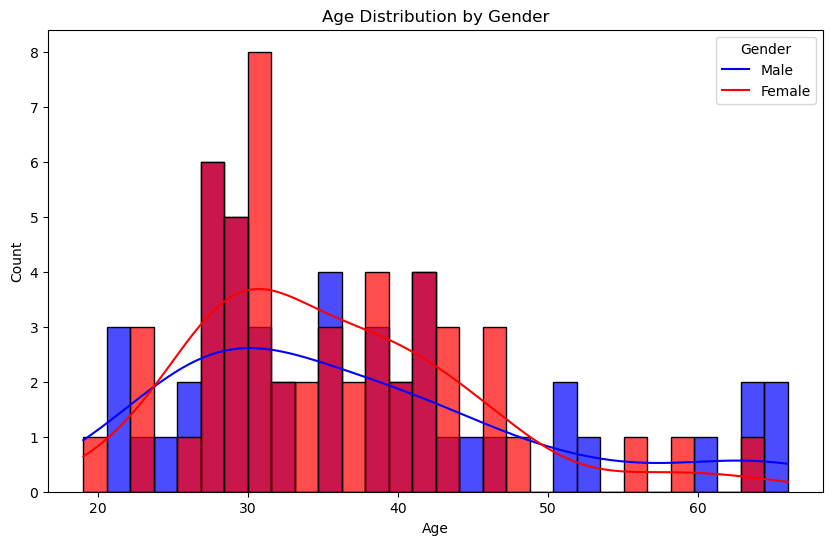

In [ ]:
plt.figure(figsize = (10,6))
color_pallete = {'Male': 'Blue','Female':'Red'}
sns.histplot(data = df, x = 'Age', hue = 'Gender', kde = True, bins = 30, alpha =0.7,palette = color_pallete)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title("Age Distribution by Gender")

plt.legend(title ='Gender', labels=['Male','Female'])
plt.show()

Age Distribution:

The histograms display the distribution of ages for both genders.
Central Tendency:

Identify the central tendency of the age distribution, which could be inferred from the peaks in the histograms.
Spread:

Assess the spread or variability in the age distribution.
Comparison between Genders:

Compare the shapes of the histograms to identify any differences in the age distribution between genders.
Skewness:

Evaluate the skewness of each distribution. A symmetric distribution will have a similar shape on both sides of the central peak.
Kernel Density Estimation (KDE):

The overlaid KDE plots provide a smoothed representation of the age distribution.
Peak Ages:

Identify any peaks in the distributions that may indicate common or prevalent ages for each gender.
Outliers:

Check for the presence of outliers or unusual patterns in the age distribution.

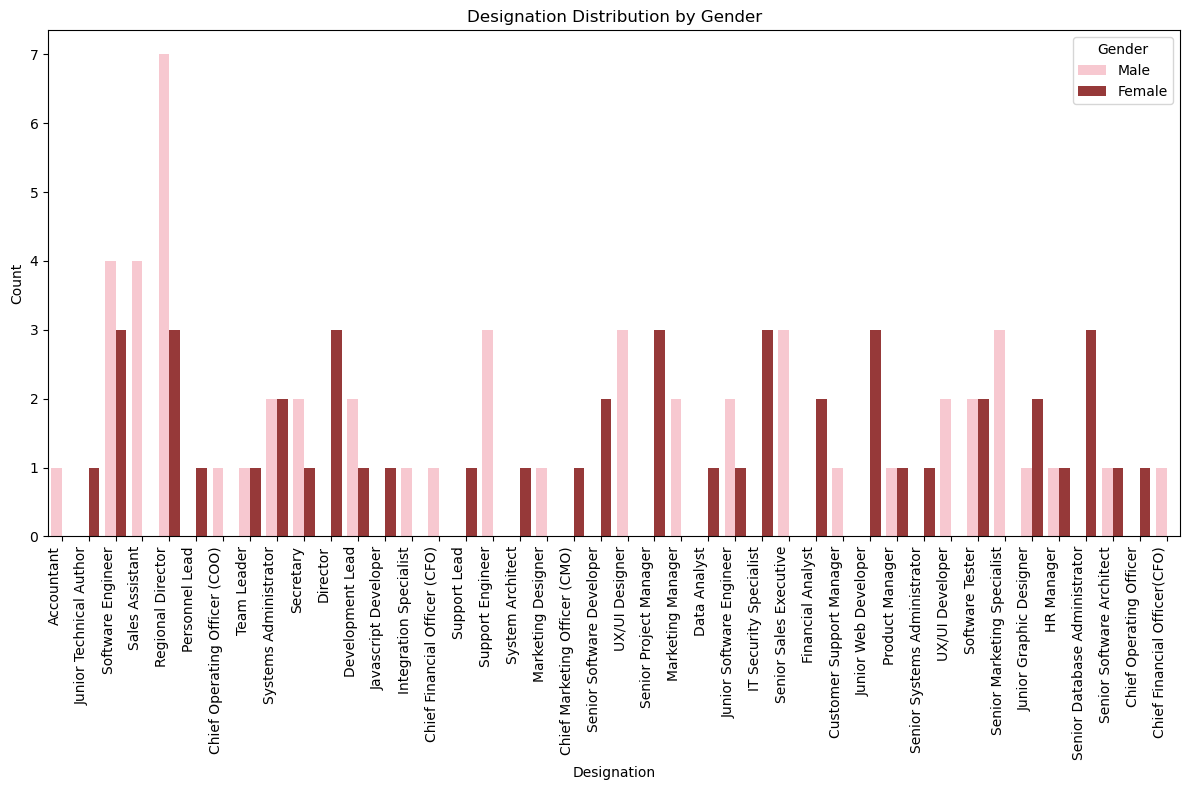

In [ ]:
plt.figure(figsize = (12,8))
sns.countplot(data = df, x = 'Designation', hue = 'Gender', palette = {'Male': 'Brown', 'Female':'pink'})
plt.xlabel('Designation')
plt.ylabel('Count')
plt.title('Designation Distribution by Gender')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90, ha='right')

# Show the legend with specified labels
plt.legend(title='Gender', labels=['Male', 'Female'])

# Show the plot
plt.tight_layout()
plt.show()

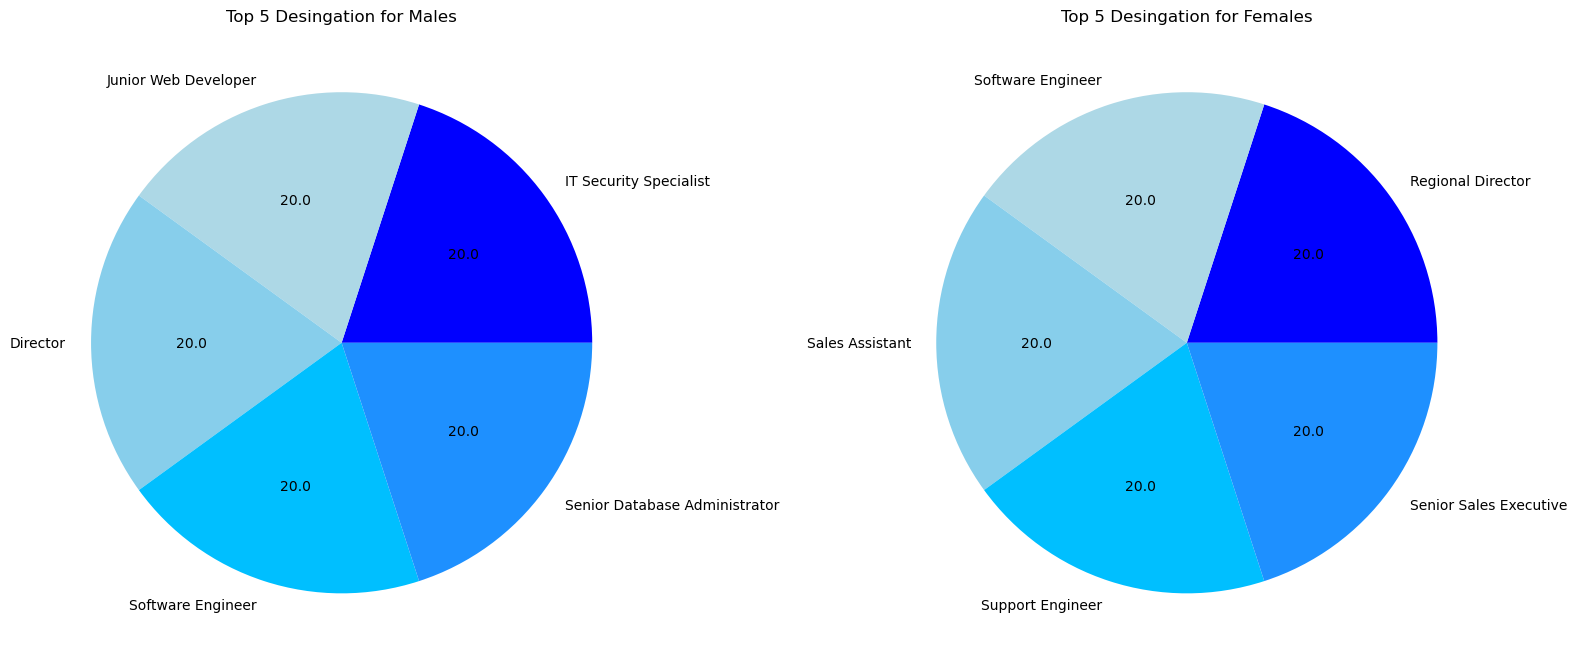

In [ ]:
plt.figure(figsize = (16,8))


top_male = df[df['Gender'] == 'Male']['Designation'].value_counts().nlargest(5)
plt.subplot(1,2,1)
plt.pie(top_male, labels = top_male.index, autopct = '%1.1f', startangle = 0, colors=['blue', 'lightblue', 'skyblue', 'deepskyblue', 'dodgerblue'])
plt.title("Top 5 Desingation for Males")


top_female = df[df['Gender'] == 'Female']['Designation'].value_counts().nlargest(5)
plt.subplot(1,2,2)
plt.pie(top_male, labels = top_female.index, autopct = '%1.1f', startangle = 0, colors=['blue', 'lightblue', 'skyblue', 'deepskyblue', 'dodgerblue'])
plt.title("Top 5 Desingation for Females")

# adjust the layout for eliminating overwriting of text.
plt.tight_layout()

# show the plot
plt.show()

In [ ]:
print("Top 10 Highest Paid Male Employees")
top_salaried_employees = df[df['Gender']=='Male'].nlargest(10,'Salary')
top_salaried_employees

Top 10 Highest Paid Male Employees


,Name,Gender,Start date,Age,Designation,Office Location,Salary,Email
67,Henry Turner,Male,2010-05-30,64,Chief Operating Officer,San Francisco,850000,henryturner@gmail.com
27,Yuri Berry,Male,2009-06-25,40,Chief Marketing Officer (CMO),New York,675000,yuriberry@gmail.com
13,Jackson Bradshaw,Male,2008-09-26,65,Director,New York,645750,jacksonbradshaw@gmail.com
55,Liam Powell,Male,2010-06-27,63,Director,New York,645750,liampowell@gmail.com
87,Kai Ramirez,Male,2010-04-10,24,Director,Singapore,645750,kairamirez@gmail.com
63,Mason Sullivan,Male,2010-09-12,51,Regional Director,London,470600,masonsullivan@gmail.com
79,Gideon Barrett,Male,2011-08-03,35,Regional Director,San Francisco,356250,gideonbarrett@gmail.com
65,Jackson Barrett,Male,2012-08-06,35,Development Lead,New York,345000,jacksonbarrett@gmail.com
20,Quinn Flynn,Male,2013-03-03,22,Support Lead,Edinburgh,342000,quinnflynn@gmail.com
25,Tiger Nixon,Male,2011-04-25,61,System Architect,Edinburgh,320800,tigernixon@gmail.com


In [ ]:
print("Top 10 Highest Paid Female Employees")
top_salaried_employees = df[df['Gender']=='Female'].nlargest(10,'Salary')
top_salaried_employees

Top 10 Highest Paid Female Employees


,Name,Gender,Start date,Age,Designation,Office Location,Salary,Email
8,Fiona Green,Female,2010-03-11,48,Chief Operating Officer (COO),San Francisco,850000,fionagreen@gmail.com
19,Paul Byrd,Female,2010-06-09,64,Chief Financial Officer (CFO),New York,725000,paulbyrd@gmail.com
78,Amara Wells,Female,2010-12-12,44,Chief Financial Officer(CFO),New York,725000,amarawells@gmail.com
5,Charde Marshall,Female,2008-10-16,36,Regional Director,San Francisco,470600,chardemarshall@gmail.com
84,Layla Wallace,Female,2012-09-14,29,Regional Director,London,470600,laylawallace@gmail.com
24,Tatyana Fitzpatrick,Female,2010-03-17,19,Regional Director,London,385750,tatyanafitzpatrick@gmail.com
92,Eva Ramirez,Female,2011-03-18,40,Regional Director,London,385750,evaramirez@gmail.com
15,Jennifer Chang,Female,2010-11-14,28,Regional Director,Singapore,357650,jenniferchang@gmail.com
11,Hermione Butler,Female,2011-03-21,47,Regional Director,London,356250,hermionebutler@gmail.com
14,Jenette Caldwell,Female,2011-09-03,30,Development Lead,New York,345000,jenettecaldwell@gmail.com


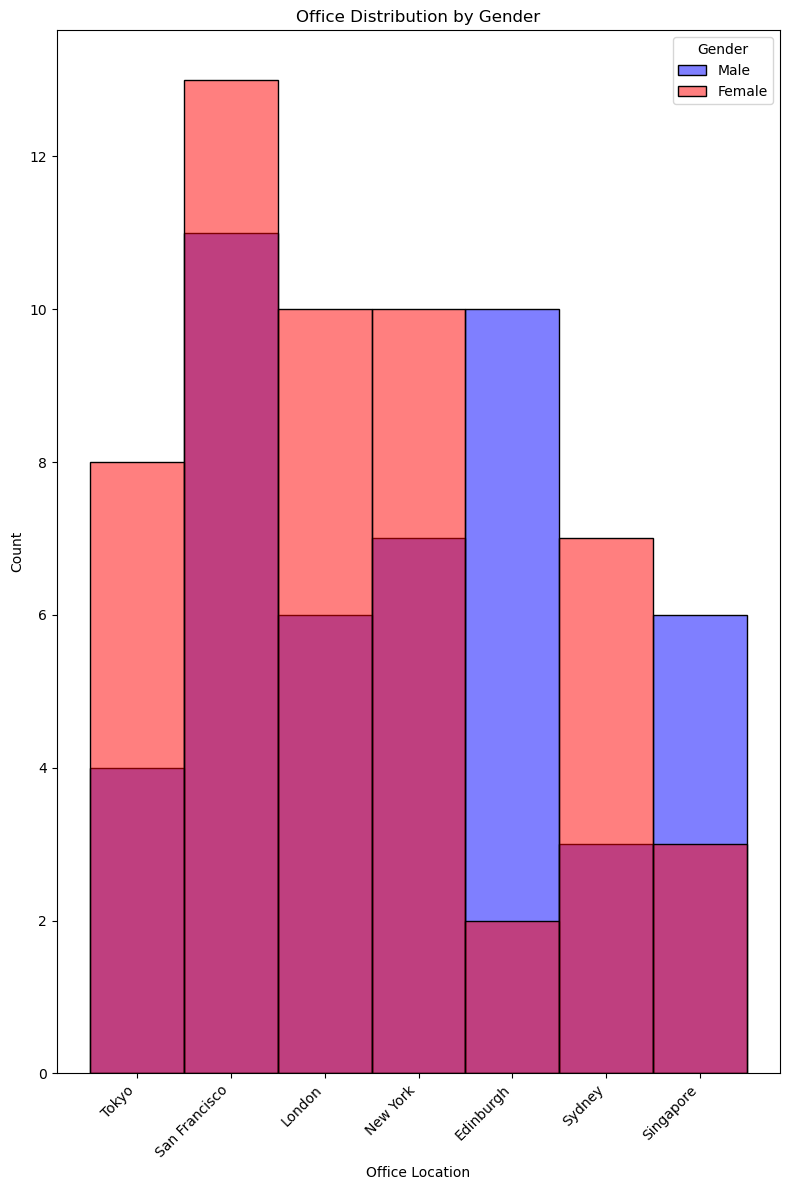

In [ ]:
Male_employees = df[df['Gender']=='Male']

Female_employees = df[df['Gender']=='Female']


plt.figure(figsize = (8,12))

#plotting a histgram
sns.histplot(df, x= 'Office Location', hue='Gender', palette = {'Male':'Blue', 'Female': 'Red'}, edgecolor = 'black')


# Set labels and title
plt.xlabel('Office Location')
plt.ylabel('Count')
plt.title('Office Distribution by Gender')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the legend with specified labels
plt.legend(title='Gender', labels=['Male', 'Female'])

# Show the plot
plt.tight_layout()
plt.show()